In [112]:
import lucem_illud_2020 #pip install git+git://github.com/Computational-Content-Analysis-2020/lucem_illud_2020.git

#All these packages need to be installed from pip
import requests #for http requests
import pandas as pd#gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import wordcloud #Makes word clouds
import numpy as np #For divergences/distances
import scipy #For divergences/distances
import seaborn as sns #makes our plots look nicer
import sklearn.manifold #For a manifold plot
import json #For API responses
import urllib.parse #For joining urls

# comp-linguistics
import spacy

#Displays the graphs
import graphviz #You also need to install the command line graphviz

#These are from the standard library
import os.path
import zipfile
import subprocess
import io
import tempfile
import nltk

#All these packages need to be installed from pip
import gensim#For word2vec, etc
import requests #For downloading our datasets

import sklearn.metrics.pairwise #For cosine similarity
import sklearn.decomposition #For PCA
import copy

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning
%matplotlib inline

import os #For looking through files
import os.path #For managing file paths

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook
%matplotlib inline

In [114]:
#import text data extracted from NOW corpus
mycorpus=pd.read_csv('C:/Users/74068/Documents/Uchicago/courses/Content Analysis/corpus/now_tech.csv')
mycorpus.head(10)

,Unnamed: 0,Unnamed: 0.1,filename,Year,Month,Country,id,Tokenized Text,Normalized Text,Raw
0,0,0,16-10-au.txt,16,10,au.txt,b'@@14645669,"['Popular', 'Stories', '<', 'h', '>', 'Local',...","['popular', 'story', '<', 'h', '>', 'local', '...",b'@@14645669 <h> Popular Stories <h> Local Rea...
1,1,1,16-10-au.txt,16,10,au.txt,b'@@14661683,"['The', 'pharmacy', 'of', 'the', 'future', '<'...","['pharmacy', 'future', '<', 'h', '>', 'build',...",b'@@14661683 <h> The pharmacy of the future <h...
2,2,2,16-10-au.txt,16,10,au.txt,"b""@@14667555","['Next', 'generation', 'data', 'storage', 'tec...","['generation', 'datum', 'storage', 'technology...","b""@@14667555 <p> Next generation data storage ..."
3,3,3,16-10-au.txt,16,10,au.txt,b'@@14671644,"['How', 'to', 'Start', 'an', 'Asteroid', 'Mini...","['start', 'asteroid', 'mine', 'company', '<', ...",b'@@14671644 <h> How to Start an Asteroid Mini...
4,4,4,16-10-au.txt,16,10,au.txt,b'@@14672432,"['Here', ""'s"", 'what', 'Space', 'X', 'and', 'a...","['space', 'x', 'high', 'speed', 'trade', 'firm...",b'@@14672432 <h> Here \'s what Space-X and a h...
5,5,5,16-10-au.txt,16,10,au.txt,b'@@14672435,"['We', ""\\'ve"", 'avoided', 'all', 'but', 'a', ...","[""\\'ve"", 'avoid', 'light', 'spoiler', '40-yea...",b'@@14672435 <p> We \'ve avoided all but a few...
6,6,6,16-10-au.txt,16,10,au.txt,b'@@14676223,"['Cinder', 'is', 'an', 'award', 'winning', 'di...","['cinder', 'award', 'win', 'digital', 'agency'...",b'@@14676223 <p> Cinder is an award-winning di...
7,7,7,16-10-au.txt,16,10,au.txt,b'@@14677402,"['Gartner', 'Inc', 'NYSE', 'IT', 'is', 'the', ...","['gartner', 'inc', 'nyse', 'world', 'lead', 'i...","b'@@14677402 <p> Gartner , Inc . ( NYSE : IT )..."
8,8,8,16-10-au.txt,16,10,au.txt,b'@@14678621,"['Telstra', 'trials', 'connected', 'car', 'tec...","['telstra', 'trial', 'connect', 'car', 'techno...",b'@@14678621 <h> Telstra trials connected car ...
9,9,9,16-10-au.txt,16,10,au.txt,b'@@14678623,"['Vogue', 'is', 'embarking', 'on', 'a', 'missi...","['vogue', 'embark', 'mission', 'introduce', 'w...",b'@@14678623 <p> Vogue is embarking on a missi...


In [115]:
mycorpus=mycorpus.drop(columns=['Tokenized Text', 'Normalized Text'])

In [116]:
mycorpus['tokenized_text'] = mycorpus['Raw'].apply(lambda x: [lucem_illud_2020.word_tokenize(s) for s in lucem_illud_2020.sent_tokenize(x)])
mycorpus['normalized_tokens'] = mycorpus['tokenized_text'].apply(lambda x: [lucem_illud_2020.normalizeTokens(s) for s in x])

In [61]:
mycorpus['tokenized_text'] = mycorpus['Raw'].apply(lambda x: lucem_illud_2020.word_tokenize(x))
mycorpus['normalized_tokens'] = mycorpus['tokenized_text'].apply(lambda x: lucem_illud_2020.normalizeTokens(x))

In [74]:
mycorpus['normalized_tokens'][1]

["b'@@14661683",
 '<',
 'h',
 '>',
 'pharmacy',
 'future',
 '<',
 'h',
 '>',
 'build',
 'pharmacy',
 'future',
 'rob',
 'sztar',
 'describe',
 'technology',
 'need',
 'know',
 '<',
 'p',
 '>',
 'fortunate',
 'live',
 '3rd',
 'industrial',
 'revolution',
 'know',
 'digital',
 'revolution',
 'information',
 'age',
 "\\'ve",
 'witness',
 'landmark',
 'event',
 'origin',
 'internet',
 'mobile',
 'phone',
 'cloud',
 'compute',
 'year',
 'consider',
 'world',
 'large',
 'taxi',
 'firm',
 'uber',
 'own',
 'car',
 'world',
 'popular',
 'medium',
 'company',
 'facebook',
 'create',
 'content',
 '<',
 'p',
 '>',
 'world',
 'valuable',
 'retailer',
 'alibaba',
 'carry',
 'stock',
 'world',
 'large',
 'accommodation',
 'provider',
 'airbnb',
 'own',
 'property',
 'possible',
 'technology',
 'access',
 'today',
 'world',
 'live',
 'change',
 'exponential',
 'pace',
 'change',
 'know',
 'simply',
 'overwhelm',
 'think',
 'integrate',
 'technology',
 'pharmacy',
 'business',
 'believe',
 'grind',
 's

In [113]:
mycorpus.head()

,Unnamed: 0,Unnamed: 0.1,filename,Year,Month,Country,id,Tokenized Text,Normalized Text,Raw,tokenized_text,normalized_tokens,reduced_tokens
0,0,0,16-10-au.txt,16,10,au.txt,b'@@14645669,"['Popular', 'Stories', '<', 'h', '>', 'Local',...","['popular', 'story', '<', 'h', '>', 'local', '...",b'@@14645669 <h> Popular Stories <h> Local Rea...,"[b'@@14645669, <, h, >, Popular, Stories, <, h...","[b'@@14645669, <, h, >, popular, story, <, h, ...","[locomotive, envy, cane, rsus, cane, locomotiv..."
1,1,1,16-10-au.txt,16,10,au.txt,b'@@14661683,"['The', 'pharmacy', 'of', 'the', 'future', '<'...","['pharmacy', 'future', '<', 'h', '>', 'build',...",b'@@14661683 <h> The pharmacy of the future <h...,"[b'@@14661683, <, h, >, The, pharmacy, of, the...","[b'@@14661683, <, h, >, pharmacy, future, <, h...","[pharmacy, pharmacy, rob, sztar, fortunate, la..."
2,2,2,16-10-au.txt,16,10,au.txt,"b""@@14667555","['Next', 'generation', 'data', 'storage', 'tec...","['generation', 'datum', 'storage', 'technology...","b""@@14667555 <p> Next generation data storage ...","[b""@@14667555, <, p, >, Next, generation, data...","[b""@@14667555, <, p, >, generation, datum, sto...","[chunk, hp, cater, emc, micron, nand, flourish..."
3,3,3,16-10-au.txt,16,10,au.txt,b'@@14671644,"['How', 'to', 'Start', 'an', 'Asteroid', 'Mini...","['start', 'asteroid', 'mine', 'company', '<', ...",b'@@14671644 <h> How to Start an Asteroid Mini...,"[b'@@14671644, <, h, >, How, to, Start, an, As...","[b'@@14671644, <, h, >, start, asteroid, mine,...","[asteroid, outer, asteroid, meteor, platinum, ..."
4,4,4,16-10-au.txt,16,10,au.txt,b'@@14672432,"['Here', ""'s"", 'what', 'Space', 'X', 'and', 'a...","['space', 'x', 'high', 'speed', 'trade', 'firm...",b'@@14672432 <h> Here \'s what Space-X and a h...,"[b'@@14672432, <, h, >, Here, 's, what, Space,...","[b'@@14672432, <, h, >, space, x, high, speed,...","[overlap, phds, mar, bond, bread, butter, epic..."


In [ ]:
#not lematized
mycorpus['tokenized_notlema'] = mycorpus['Raw'].apply(lambda x: [lucem_illud_2020.word_tokenize(s) for s in lucem_illud_2020.sent_tokenize(x)])

In [ ]:
mycorpus['normalized_notlema'] = mycorpus['tokenized_notlema'].apply(lambda x: [lucem_illud_2020.normalizeTokens(s, lemma=False) for s in x])

In [137]:
mycorpus.head()

,Unnamed: 0,Unnamed: 0.1,filename,Year,Month,Country,id,Raw,tokenized_text,normalized_tokens,tokenized_notlema,normalized_notlema
0,0,0,16-10-au.txt,16,10,au.txt,b'@@14645669,b'@@14645669 <h> Popular Stories <h> Local Rea...,"[b'@@14645669, <, h, >, Popular, Stories, <, h...","[b'@@14645669, <, h, >, popular, story, <, h, ...","[[b'@@14645669, <, h, >, Popular, Stories, <, ...","[[b'@@14645669, <, h, >, popular, stories, <, ..."
1,1,1,16-10-au.txt,16,10,au.txt,b'@@14661683,b'@@14661683 <h> The pharmacy of the future <h...,"[b'@@14661683, <, h, >, The, pharmacy, of, the...","[b'@@14661683, <, h, >, pharmacy, future, <, h...","[[b'@@14661683, <, h, >], [The, pharmacy, of, ...","[[b'@@14661683, <, h, >], [pharmacy, future], ..."
2,2,2,16-10-au.txt,16,10,au.txt,"b""@@14667555","b""@@14667555 <p> Next generation data storage ...","[b""@@14667555, <, p, >, Next, generation, data...","[b""@@14667555, <, p, >, generation, datum, sto...","[[b""@@14667555, <, p, >, Next, generation, dat...","[[b""@@14667555, <, p, >, generation, data, sto..."
3,3,3,16-10-au.txt,16,10,au.txt,b'@@14671644,b'@@14671644 <h> How to Start an Asteroid Mini...,"[b'@@14671644, <, h, >, How, to, Start, an, As...","[b'@@14671644, <, h, >, start, asteroid, mine,...","[[b'@@14671644, <, h, >], [How, to, Start, an,...","[[b'@@14671644, <, h, >], [start, asteroid, mi..."
4,4,4,16-10-au.txt,16,10,au.txt,b'@@14672432,b'@@14672432 <h> Here \'s what Space-X and a h...,"[b'@@14672432, <, h, >, Here, 's, what, Space,...","[b'@@14672432, <, h, >, space, x, high, speed,...","[[b'@@14672432, <, h], [>], [Here, 's, what, S...","[[b'@@14672432, <, h], [>], [space, x, high, s..."


In [117]:
# by year
mycorpus_10=mycorpus[mycorpus['Year']==10]
mycorpus_11=mycorpus[mycorpus['Year']==11]
mycorpus_12=mycorpus[mycorpus['Year']==12]
mycorpus_13=mycorpus[mycorpus['Year']==13]
mycorpus_14=mycorpus[mycorpus['Year']==14]
mycorpus_15=mycorpus[mycorpus['Year']==15]
mycorpus_16=mycorpus[mycorpus['Year']==16]
mycorpus_17=mycorpus[mycorpus['Year']==17]
mycorpus_18=mycorpus[mycorpus['Year']==18]
mycorpus_19=mycorpus[mycorpus['Year']==19]

list_byYear=[mycorpus_10, mycorpus_11,mycorpus_12, mycorpus_13,mycorpus_14, mycorpus_15,mycorpus_16, mycorpus_17,mycorpus_18, mycorpus_19]

In [118]:
mycorpus_year1=pd.concat([mycorpus_10,mycorpus_11,mycorpus_12])
mycorpus_year2=pd.concat([mycorpus_13,mycorpus_14,mycorpus_15,mycorpus_16])
mycorpus_year3=pd.concat([mycorpus_17,mycorpus_18,mycorpus_19])

In [119]:
# by country
mycorpus_au=mycorpus[mycorpus['Country']=='au.txt']
mycorpus_bd=mycorpus[mycorpus['Country']=='bd.txt']
mycorpus_ca=mycorpus[mycorpus['Country']=='ca.txt']
mycorpus_gb=mycorpus[mycorpus['Country']=='gb.txt']
mycorpus_gh=mycorpus[mycorpus['Country']=='gh.txt']
mycorpus_hk=mycorpus[mycorpus['Country']=='hk.txt']
mycorpus_ie=mycorpus[mycorpus['Country']=='ie.txt']
mycorpus_in=mycorpus[mycorpus['Country']=='in.txt']
mycorpus_jm=mycorpus[mycorpus['Country']=='jm.txt']
mycorpus_ke=mycorpus[mycorpus['Country']=='ke.txt']
mycorpus_lk=mycorpus[mycorpus['Country']=='lk.txt']
mycorpus_my=mycorpus[mycorpus['Country']=='my.txt']
mycorpus_ng=mycorpus[mycorpus['Country']=='ng.txt']
mycorpus_nz=mycorpus[mycorpus['Country']=='nz.txt']
mycorpus_ph=mycorpus[mycorpus['Country']=='ph.txt']
mycorpus_pk=mycorpus[mycorpus['Country']=='pk.txt']
mycorpus_sg=mycorpus[mycorpus['Country']=='sg.txt']
mycorpus_tz=mycorpus[mycorpus['Country']=='tz.txt']
mycorpus_us=mycorpus[mycorpus['Country']=='us.txt']
mycorpus_za=mycorpus[mycorpus['Country']=='za.txt']

In [120]:
# by development
mycorpus_developed=pd.concat([mycorpus_au,mycorpus_ca,mycorpus_gb,mycorpus_hk,mycorpus_ie,mycorpus_nz,mycorpus_us])

mycorpus_developing=pd.concat([mycorpus_bd,mycorpus_gh,mycorpus_in,mycorpus_jm,mycorpus_ke,mycorpus_lk,mycorpus_my,mycorpus_ng,
                              mycorpus_ph,mycorpus_pk,mycorpus_sg,mycorpus_tz,mycorpus_za])

In [80]:
print(mycorpus_developed.shape)
mycorpus_developing.shape

(3993, 13)


(3039, 13)

In [81]:
mycorpus['Country'].unique()

array(['au.txt', 'bd.txt', 'ca.txt', 'gb.txt', 'gh.txt', 'hk.txt',
       'ie.txt', 'in.txt', 'jm.txt', 'ke.txt', 'lk.txt', 'my.txt',
       'ng.txt', 'nz.txt', 'ph.txt', 'pk.txt', 'sg.txt', 'tz.txt',
       'us.txt', 'za.txt', 'in1.txt', 'in2.txt', 'us1.txt', 'us2.txt',
       'us3.txt', 'us4.txt', 'us5.txt', 'xx.txt'], dtype=object)

In [82]:
mycorpus['Year'].unique()

array([16, 18, 12, 14, 10, 11, 19, 13], dtype=int64)

In [ ]:
for country in list_c:
    for year in list_y:
        num=mycorpus[mycorpus['country']==country && mycorpus['Year'==year]].shape[0]
        

### Number of news

In [ ]:
df_numByYear=pd.DataFrame(columns=['Year', 'Number of News'])

for i in 0:len(list_byYear)-1:
    df_numByYearnumByYear['Year']=list_byYear[i].name
    

In [ ]:
list_byYear[0].name

### Word frequency count:

In [15]:
countsDict = {}
for word in mycorpus_year1['normalized_tokens'].sum():
    if word in countsDict:
        countsDict[word] += 1
    else:
        countsDict[word] = 1
word_counts = sorted(countsDict.items(), key = lambda x : x[1], reverse = True)

In [35]:
len(mycorpus_year1['normalized_tokens'].sum())

114045

In [38]:
len(mycorpus_year2['normalized_tokens'].sum())

358863

In [7]:
word_counts[:50]

[('<', 266159),
 ('>', 266159),
 ('p', 246733),
 ('technology', 64848),
 ('say', 33593),
 ('company', 32622),
 ('new', 25903),
 ('year', 25754),
 ('time', 21800),
 ('business', 20681),
 ("n\\'t", 20242),
 ('h', 20146),
 ('work', 18458),
 ('service', 18008),
 ('use', 17641),
 ('market', 17562),
 ('people', 17035),
 ('need', 17014),
 ('like', 16380),
 ('datum', 15855),
 ('system', 14819),
 ('provide', 14776),
 ('include', 14738),
 ('world', 14729),
 ('industry', 13213),
 ('way', 12936),
 ('well', 12787),
 ('$', 12580),
 ('share', 12483),
 ('change', 12430),
 ('information', 12237),
 ('product', 12145),
 ('state', 11239),
 ('come', 11139),
 ('base', 11132),
 ('high', 11061),
 ('look', 10920),
 ('think', 10857),
 ('help', 10677),
 ('know', 9839),
 ('cost', 9835),
 ('government', 9819),
 ('go', 9765),
 ('digital', 9725),
 ('development', 9715),
 ('build', 9602),
 ('research', 9459),
 ('have', 9441),
 ('country', 9437),
 ('offer', 9421)]

In [82]:
nlp = spacy.load("en")
nlp.max_length = 2000000
def spacy_pos(word_list):
    tags = []
    doc = nlp(word_list.lower())
    for w in doc:
        tags.append((w.text, w.tag_))
    return tags

In [16]:
mycorpus['normalized_tokens_POS'] = [spacy_pos(t) for t in mycorpus['Raw']]

In [ ]:
mycorpus_19['normalized_tokens_POS'] = [spacy_pos(t) for t in mycorpus_19['Raw']]

In [22]:
cfdist_POStoWord_developed = nltk.ConditionalFreqDist((p, w) for w, p in mycorpus_developed['normalized_tokens_POS'].sum())

In [23]:
cfdist_POStoWord_developing = nltk.ConditionalFreqDist((p, w) for w, p in mycorpus_developing['normalized_tokens_POS'].sum())

In [30]:
cfdist_POStoWord_year1 = nltk.ConditionalFreqDist((p, w) for w, p in mycorpus_year1['normalized_tokens_POS'].sum())
cfdist_POStoWord_year2 = nltk.ConditionalFreqDist((p, w) for w, p in mycorpus_year2['normalized_tokens_POS'].sum())
cfdist_POStoWord_year3 = nltk.ConditionalFreqDist((p, w) for w, p in mycorpus_year3['normalized_tokens_POS'].sum())

In [41]:
NTarget = 'JJ'
Word = 'technology'
NResults = set()
for entry in mycorpus_10['normalized_tokens_POS']:
    for sentence in entry:
        for (ent1, kind1),(ent2,kind2) in zip(sentence[:-1], sentence[1:]):
            if (kind1,ent2.lower())==(NTarget,Word):
                NResults.add(ent1)
            else:
                continue

print(NResults)

ValueError: too many values to unpack (expected 2)

In [47]:
cfdist_POStoWord_year1['VB'].most_common(30)

[('be', 7931),
 ('have', 2537),
 ('do', 1273),
 ('make', 1251),
 ('get', 1205),
 ('see', 947),
 ("n\\'t", 847),
 ('@', 817),
 ('use', 815),
 ('take', 787),
 ('go', 716),
 ('say', 630),
 ('help', 536),
 ('think', 463),
 ('know', 440),
 ('give', 416),
 ('provide', 404),
 ('come', 402),
 ('work', 390),
 ('look', 381),
 ('find', 366),
 ('create', 364),
 ('let', 353),
 ('draw', 350),
 ('demonstrate', 347),
 ('keep', 346),
 ('offer', 333),
 ('sell', 302),
 ('build', 301),
 ('become', 292)]

In [45]:
cfdist_POStoWord_year2['JJ'].most_common(30).

SyntaxError: invalid syntax (<ipython-input-45-3a54a9734d1c>, line 1)

In [46]:
cfdist_POStoWord_year3['VB'].most_common(30)

[('be', 33537),
 ('have', 7165),
 ('make', 4286),
 ('do', 3168),
 ('@', 2957),
 ('provide', 2866),
 ('help', 2842),
 ('get', 2751),
 ('take', 2742),
 ('use', 2497),
 ('see', 2402),
 ('create', 1825),
 ('go', 1686),
 ("n\\'t", 1642),
 ('develop', 1464),
 ('build', 1439),
 ('improve', 1425),
 ('work', 1387),
 ('become', 1371),
 ('ensure', 1368),
 ('continue', 1290),
 ('keep', 1168),
 ('increase', 1139),
 ('give', 1130),
 ('find', 1076),
 ('support', 1041),
 ('change', 1039),
 ('bring', 1023),
 ('come', 1018),
 ('think', 991)]

In [24]:
cfdist_POStoWord_developed['JJ'].most_common(30)

[('new', 12938),
 ('other', 9122),
 ('such', 6342),
 ('many', 6003),
 ('first', 5051),
 ('high', 4173),
 ('-', 4057),
 ('digital', 4045),
 ('global', 3579),
 ('same', 3552),
 ('different', 3313),
 ('big', 3293),
 ('last', 3116),
 ('good', 3077),
 ('next', 3032),
 ('own', 2986),
 ('real', 2876),
 ('able', 2822),
 ('important', 2524),
 ('public', 2512),
 ('few', 2451),
 ('small', 2441),
 ('social', 2416),
 ('human', 2381),
 ('mobile', 2331),
 ('available', 2326),
 ('financial', 2244),
 ('great', 2229),
 ('large', 2125),
 ('much', 2090)]

In [25]:
cfdist_POStoWord_developing['JJ'].most_common(30)

[('new', 6568),
 ('other', 5195),
 ('such', 4187),
 ('many', 3132),
 ('online', 3109),
 ('digital', 3103),
 ('first', 2955),
 ('global', 2641),
 ('-', 2383),
 ('high', 2379),
 ('last', 2063),
 ('same', 1982),
 ('available', 1929),
 ('good', 1922),
 ('mobile', 1883),
 ('financial', 1852),
 ('next', 1834),
 ('local', 1833),
 ('big', 1695),
 ('able', 1690),
 ('different', 1628),
 ('african', 1623),
 ('key', 1595),
 ('public', 1489),
 ('own', 1450),
 ('social', 1414),
 ('top', 1390),
 ('human', 1367),
 ('important', 1365),
 ('techcentral', 1356)]

In [26]:
cfdist_POStoWord_developed['NN'].most_common(30)

[('p', 74813),
 ('technology', 28970),
 ('\\', 10056),
 ('time', 9570),
 ('company', 8553),
 ('business', 8008),
 ('world', 7277),
 ('year', 6395),
 ('information', 5956),
 ('market', 5891),
 ('way', 5799),
 ('industry', 5742),
 ("n\\'t", 5330),
 ('system', 4749),
 ('research', 4691),
 ('energy', 4548),
 ('%', 4285),
 ('power', 4136),
 ('use', 3917),
 ('government', 3858),
 ('development', 3747),
 ('part', 3453),
 ('work', 3338),
 ('future', 3321),
 ('tech', 3279),
 ('today', 3171),
 ('software', 3010),
 ('service', 2906),
 ('day', 2882),
 ('experience', 2857)]

In [27]:
cfdist_POStoWord_developing['NN'].most_common(30)

[('p', 44948),
 ('technology', 22458),
 ('business', 5586),
 ('\\', 5146),
 ('company', 5129),
 ('world', 4815),
 ('time', 4785),
 ('industry', 4141),
 ('information', 3825),
 ('government', 3789),
 ('year', 3750),
 ('market', 3675),
 ('country', 3456),
 ('development', 3099),
 ('%', 3034),
 ('system', 2912),
 ('way', 2902),
 ('news', 2708),
 ('research', 2429),
 ('sector', 2383),
 ('tech', 2217),
 ('value', 2187),
 ('use', 2147),
 ('service', 2128),
 ('advertising', 2069),
 ('space', 2053),
 ('growth', 2046),
 ('team', 1947),
 ('innovation', 1935),
 ('power', 1931)]

In [28]:
cfdist_POStoWord_developed['VB'].most_common(30)

[('be', 33171),
 ('have', 8004),
 ('make', 5187),
 ('do', 4639),
 ('get', 4192),
 ('see', 3743),
 ('@', 3346),
 ('take', 3304),
 ('help', 3187),
 ('use', 3170),
 ("n\\'t", 3096),
 ('go', 2329),
 ('provide', 2192),
 ('create', 2081),
 ('work', 2009),
 ('find', 1790),
 ('think', 1676),
 ('know', 1667),
 ('look', 1569),
 ('build', 1535),
 ('keep', 1510),
 ('become', 1452),
 ('give', 1425),
 ('improve', 1416),
 ('say', 1414),
 ('develop', 1384),
 ('come', 1371),
 ('change', 1262),
 ('understand', 1241),
 ('need', 1207)]

In [29]:
cfdist_POStoWord_developing['VB'].most_common(30)

[('be', 19292),
 ('have', 5077),
 ('make', 2977),
 ('do', 2323),
 ('get', 2117),
 ('help', 2008),
 ('take', 2002),
 ('@', 1942),
 ('use', 1883),
 ('see', 1720),
 ('provide', 1579),
 ('go', 1311),
 ('create', 1197),
 ('say', 1192),
 ("n\\'t", 1106),
 ('ensure', 1011),
 ('come', 1000),
 ('improve', 988),
 ('deliver', 977),
 ('build', 977),
 ('offer', 969),
 ('draw', 960),
 ('demonstrate', 949),
 ('develop', 937),
 ('work', 924),
 ('give', 917),
 ('bring', 895),
 ('become', 884),
 ('keep', 798),
 ('look', 756)]

In [101]:
cfdist_POStoWord_10['JJ'].most_common(30)

[('new', 545),
 ('other', 394),
 ('many', 309),
 ('such', 260),
 ('online', 238),
 ('good', 208),
 ('same', 185),
 ('first', 167),
 ('big', 162),
 ('-', 157),
 ('own', 157),
 ('high', 143),
 ('different', 137),
 ('available', 136),
 ('local', 133),
 ('much', 131),
 ('next', 113),
 ('techcentral', 112),
 ('few', 109),
 ('mobile', 109),
 ('old', 108),
 ('last', 104),
 ('real', 101),
 ('personal', 99),
 ('digital', 98),
 ('great', 96),
 ('national', 96),
 ('able', 92),
 ('long', 91),
 ('right', 90)]

In [93]:
cfdist_POStoWord_10['NN'].most_common(30)

[('p', 3086),
 ('technology', 1289),
 ('\\', 466),
 ('time', 449),
 ('car', 374),
 ('information', 374),
 ('company', 363),
 ('government', 330),
 ('business', 325),
 ('world', 257),
 ('power', 240),
 ('way', 229),
 ("n\\'t", 215),
 ('market', 213),
 ('system', 211),
 ('news', 203),
 ('year', 197),
 ('industry', 193),
 ('energy', 182),
 ('advertising', 182),
 ('security', 161),
 ('country', 158),
 ('space', 158),
 ('development', 156),
 ('service', 153),
 ('web', 152),
 ('computer', 149),
 ('lancer', 147),
 ('quality', 146),
 ('money', 146)]

In [102]:
cfdist_POStoWord_19['NN'].most_common(30)

[('p', 43442),
 ('technology', 9029),
 ('company', 7488),
 ('stock', 5736),
 ('time', 5322),
 ('business', 4242),
 ('\\', 3790),
 ('year', 3348),
 ('%', 3263),
 ('information', 3219),
 ('service', 3200),
 ('state', 3054),
 ('market', 2923),
 ('date', 2669),
 ('section', 2660),
 ('agreement', 2640),
 ('world', 2589),
 ('way', 2458),
 ('broadband', 2434),
 ('development', 2315),
 ('system', 2311),
 ('use', 2240),
 ('industry', 2193),
 ('government', 2189),
 ('number', 2101),
 ('power', 2012),
 ('part', 1995),
 ('board', 1941),
 ("n\\'t", 1909),
 ('product', 1896)]

In [27]:
mycorpus['Year'].unique()

array([16, 18, 12, 14, 10, 11, 19, 13], dtype=int64)

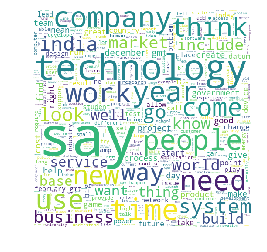

In [100]:
wc = wordcloud.WordCloud(background_color="white", max_words=500, width= 1000, height = 1000, mode ='RGBA', scale=.5).generate(','.join(mycorpus_year1['normalized_tokens_2'].sum()))                                                                                                                      
plt.imshow(wc)
plt.axis("off")
plt.savefig("word_cloud_19.pdf", format = 'pdf')

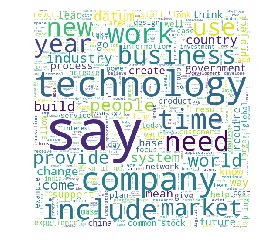

In [101]:
wc = wordcloud.WordCloud(background_color="white", max_words=500, width= 1000, height = 1000, mode ='RGBA', scale=.5).generate(' '.join(mycorpus_year3['normalized_tokens_2'].sum()))
plt.imshow(wc)
plt.axis("off")
plt.savefig("word_cloud_19.pdf", format = 'pdf')

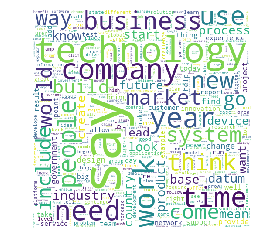

In [102]:
wc = wordcloud.WordCloud(background_color="white", max_words=500, width= 1000, height = 1000, mode ='RGBA', scale=.5).generate(' '.join(mycorpus_year2['normalized_tokens_2'].sum()))
plt.imshow(wc)
plt.axis("off")
plt.savefig("word_cloud_19.pdf", format = 'pdf')

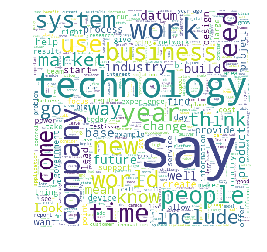

In [103]:
wc = wordcloud.WordCloud(background_color="white", max_words=500, width= 1000, height = 1000, mode ='RGBA', scale=.5).generate(' '.join(mycorpus_developed['normalized_tokens_2'].sum()))
plt.imshow(wc)
plt.axis("off")
plt.savefig("word_cloud_19.pdf", format = 'pdf')

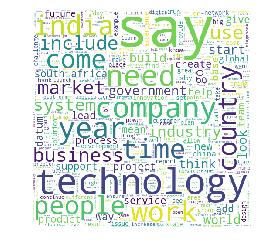

In [104]:
wc = wordcloud.WordCloud(background_color="white", max_words=500, width= 1000, height = 1000, mode ='RGBA', scale=.5).generate(' '.join(mycorpus_developing['normalized_tokens_2'].sum()))
plt.imshow(wc)
plt.axis("off")
plt.savefig("word_cloud_19.pdf", format = 'pdf')

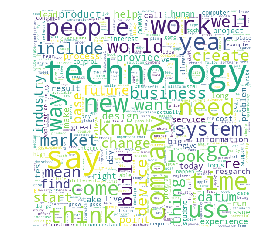

In [18]:
wc = wordcloud.WordCloud(background_color="white", max_words=500, width= 1000, height = 1000, mode ='RGBA', scale=.5).generate(' '.join(mycorpus_us['normalized_tokens'].sum()))
plt.imshow(wc)
plt.axis("off")
plt.savefig("word_cloud_19.pdf", format = 'pdf')

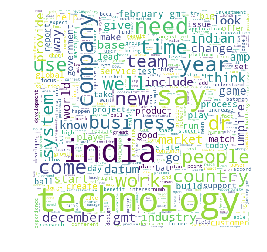

In [19]:
wc = wordcloud.WordCloud(background_color="white", max_words=500, width= 1000, height = 1000, mode ='RGBA', scale=.5).generate(' '.join(mycorpus_in['normalized_tokens'].sum()))
plt.imshow(wc)
plt.axis("off")
plt.savefig("word_cloud_19.pdf", format = 'pdf')

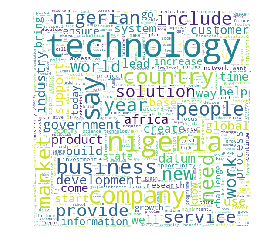

In [21]:
wc = wordcloud.WordCloud(background_color="white", max_words=500, width= 1000, height = 1000, mode ='RGBA', scale=.5).generate(' '.join(mycorpus_ng['normalized_tokens'].sum()))
plt.imshow(wc)
plt.axis("off")
plt.savefig("word_cloud_19.pdf", format = 'pdf')

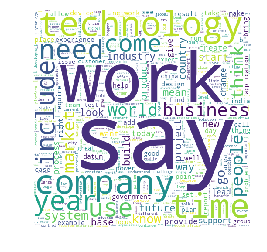

In [20]:
wc = wordcloud.WordCloud(background_color="white", max_words=500, width= 1000, height = 1000, mode ='RGBA', scale=.5).generate(' '.join(mycorpus['normalized_tokens'].sum()))
plt.imshow(wc)
plt.axis("off")
plt.savefig("word_cloud_19.pdf", format = 'pdf')

#### Collocations

In [ ]:
mycorpus['normalized_tokens_2'].remove('<')

In [107]:
whBigrams = nltk.collocations.BigramCollocationFinder.from_words(mycorpus_10['normalized_tokens_2'].sum())
print("There are {} bigrams in the finder".format(whBigrams.N))

There are 137583 bigrams in the finder


In [110]:
def bigramScoring(count, wordsTuple, total):
    return count

print(whBigrams.nbest(bigramScoring, 50))

[('<', 'p'), ('p', '>'), ('<', 'h'), ('h', '>'), ('say', '<'), ('>', 'techcentral'), ('time', '<'), ('technology', '<'), ('south', 'africa'), ('deliver', 'well'), ('technology', 'news'), ('online', 'technology'), ('well', 'return'), ('california', 'time'), ('new', 'technology'), ('techcentral', '<'), ('>', 'technology'), ('>', 'know'), ('year', 'ago'), ('e', 'mail'), ('press', 'release'), ('>', 'new'), ('>', 'information'), ('>', 'think'), ('>', 'say'), ('service', 'provider'), ('year', '<'), ('search', 'engine'), ('space', '<'), ('unite', 'state'), ('communication', 'technology'), ('company', 'technology'), ('technology', 'sector'), ("\\'d", 'like'), ('fast', 'change'), ('publisher', '<'), ('>', 'constantly'), ('change', 'world'), ('company', 'interest'), ('industry', 'professional'), ('information', 'communication'), ('return', 'investment'), ('science', 'technology'), ('tech', 'news'), ('technology', 'field'), ('>', 'provide'), ('a.m', 'california'), ('aim', 'industry'), ('audience'

In [111]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
whBigrams.score_ngrams(bigram_measures.likelihood_ratio)[:40]

[(('<', 'p'), 40339.251335285604),
 (('p', '>'), 40339.251335285604),
 (('<', 'h'), 2208.008947053814),
 (('h', '>'), 2208.008947053814),
 (('south', 'africa'), 1147.8327378120423),
 (('well', 'return'), 753.5316588650143),
 (('e', 'mail'), 686.9150928524645),
 (('deliver', 'well'), 675.6192138972074),
 (('california', 'time'), 673.4860842979532),
 (('constantly', 'regurgitate'), 651.6868960641325),
 (('forum', 'questionable'), 588.7271536198598),
 (('press', 'release'), 585.9291553772962),
 (('a.m', 'california'), 558.3543170741428),
 (('fear', 'favour'), 543.1168350943786),
 (('regurgitate', 'press'), 537.8689523156233),
 (('editorial', 'feature'), 520.8380891182923),
 (('bulletin', 'board'), 516.4747813122766),
 (('benefit', 'publicise'), 507.29771977244627),
 (('advertiser', 'disservice'), 501.10697809140356),
 (('audience', 'proportionately'), 500.46327068648196),
 (('favour', 'direct'), 495.6011300645819),
 (('direct', 'portion'), 495.57534038518116),
 (('supreme', 'court'), 491.

In [114]:
trigram_measures = nltk.collocations.TrigramAssocMeasures()
whTrigrams = nltk.collocations.TrigramCollocationFinder.from_words(mycorpus['normalized_tokens_2'].sum())


[(('<', 'p', '>'), 495.52771629073675),
 (('<', 'h', '>'), 140.30354519789626),
 (('p', '>', '<'), 106.27841585844398),
 (('>', '<', 'p'), 104.51593205474589),
 (('say', '<', 'p'), 67.43485357402201),
 (('technology', '<', 'p'), 58.533680085834874),
 (('gmt', '<', 'p'), 55.8539411502464),
 (('year', '<', 'p'), 45.18718821629347),
 (('$', '<', 'p'), 43.56264770058019),
 (('p', '>', 'technology'), 40.00295215235187),
 (('time', '<', 'p'), 38.95613656271146),
 (('p', '>', 'company'), 38.905830098737574),
 (('p', '>', 'new'), 38.583673052490745),
 (('ago', '<', 'p'), 38.29563784087012),
 (('year', 'ago', '<'), 37.360452313924114),
 (('p', '>', 'year'), 37.03047094918704),
 (('p', '>', '$'), 36.61679460110006),
 (('p', '>', "n\\'t"), 36.55925566232106),
 (('p', '>', 'think'), 35.28851571073421),
 (('p', '>', 'say'), 34.85750164688561)]

In [115]:
whTrigrams.score_ngrams(trigram_measures.student_t)[:50]

[(('<', 'p', '>'), 495.52771629073675),
 (('<', 'h', '>'), 140.30354519789626),
 (('p', '>', '<'), 106.27841585844398),
 (('>', '<', 'p'), 104.51593205474589),
 (('say', '<', 'p'), 67.43485357402201),
 (('technology', '<', 'p'), 58.533680085834874),
 (('gmt', '<', 'p'), 55.8539411502464),
 (('year', '<', 'p'), 45.18718821629347),
 (('$', '<', 'p'), 43.56264770058019),
 (('p', '>', 'technology'), 40.00295215235187),
 (('time', '<', 'p'), 38.95613656271146),
 (('p', '>', 'company'), 38.905830098737574),
 (('p', '>', 'new'), 38.583673052490745),
 (('ago', '<', 'p'), 38.29563784087012),
 (('year', 'ago', '<'), 37.360452313924114),
 (('p', '>', 'year'), 37.03047094918704),
 (('p', '>', '$'), 36.61679460110006),
 (('p', '>', "n\\'t"), 36.55925566232106),
 (('p', '>', 'think'), 35.28851571073421),
 (('p', '>', 'say'), 34.85750164688561),
 (('p', '>', 'accord'), 33.824255133426625),
 (('>', '$', '<'), 33.68543547806671),
 (('market', '<', 'p'), 32.774351757360414),
 (('company', '<', 'p'), 30.

In [ ]:
Ngrams = nltk.ngrams(mycorpus['normalized_tokens_2'].sum(), 4)
Counts = {}
for ngram in list(Ngrams):
    if ngram in Counts.keys():
        Counts[ngram] += 1
    else:
        Counts[ngram] = 1
Filtered = {}
for key in Counts.keys():
    if Counts[key] < 2:
        pass
    else:
        Filtered[key] = Counts[key]
print(Filtered)

In [116]:
mycorpus_year1['Raw'].sum().count("privacy")

166

In [117]:
mycorpus_year3['Raw'].sum().count("privacy")

781

## Topic Modelling

In [83]:
senTFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')
senTFVects = senTFVectorizer.fit_transform(mycorpus['Raw'])


In [84]:
def dropMissing(wordLst, vocab):
    return [w for w in wordLst if w in vocab]

mycorpus['reduced_tokens'] = mycorpus['normalized_tokens'].apply(lambda x: dropMissing(x, senTFVectorizer.vocabulary_.keys()))

In [90]:
dictionary = gensim.corpora.Dictionary(mycorpus['normalized_tokens'])

In [91]:
corpus = [dictionary.doc2bow(text) for text in mycorpus['normalized_tokens']]

In [92]:
gensim.corpora.MmCorpus.serialize('mycorpus.mm', corpus)
senmm = gensim.corpora.MmCorpus('mycorpus.mm')

In [95]:
senlda = gensim.models.ldamodel.LdaModel(corpus=senmm, id2word=dictionary, num_topics=20, alpha='auto', eta='auto')

In [97]:
senlda.show_topics(20)

[(0,
  '0.034*"<" + 0.027*"p" + 0.026*">" + 0.021*"technology" + 0.010*"company" + 0.009*"business" + 0.006*"say" + 0.006*"research" + 0.006*"market" + 0.006*"new"'),
 (1,
  '0.027*">" + 0.026*"<" + 0.023*"p" + 0.012*"technology" + 0.012*"device" + 0.008*"new" + 0.008*"apple" + 0.007*"samsung" + 0.007*"display" + 0.006*"market"'),
 (2,
  '0.049*"<" + 0.038*"p" + 0.037*">" + 0.009*"technology" + 0.006*"n\\\'t" + 0.006*"h" + 0.005*"use" + 0.005*"like" + 0.004*"new" + 0.004*"year"'),
 (3,
  '0.021*"p" + 0.020*">" + 0.020*"<" + 0.007*"technology" + 0.006*"n\\\'t" + 0.004*"war" + 0.004*"military" + 0.004*"korea" + 0.004*"like" + 0.004*"missile"'),
 (4,
  '0.054*"<" + 0.053*"p" + 0.051*">" + 0.007*"year" + 0.005*"say" + 0.005*"energy" + 0.005*"technology" + 0.005*"power" + 0.005*"n\\\'t" + 0.004*"cost"'),
 (5,
  '0.035*">" + 0.034*"<" + 0.031*"p" + 0.008*"include" + 0.007*"section" + 0.006*"provide" + 0.006*"technology" + 0.006*"shall" + 0.005*"require" + 0.005*"date"'),
 (6,
  '0.020*"<" + 

### Word Embedding

In [ ]:
corpusW2V = gensim.models.word2vec.Word2Vec(mycorpus['normalized_notlema'].sum())
# 

In [121]:
corpusW2V_2 = gensim.models.word2vec.Word2Vec(mycorpus['normalized_tokens'].sum())

In [33]:
corpusW2V_developed = gensim.models.word2vec.Word2Vec(mycorpus_developed['normalized_notlema'].sum())
corpusW2V_developing = gensim.models.word2vec.Word2Vec(mycorpus_developing['normalized_notlema'].sum())

In [124]:
corpusW2V_developed_2 = gensim.models.word2vec.Word2Vec(mycorpus_developed['normalized_tokens'].sum())
corpusW2V_developin_2 = gensim.models.word2vec.Word2Vec(mycorpus_developing['normalized_tokens'].sum())

In [122]:
corpusW2V_year1_2 = gensim.models.word2vec.Word2Vec(mycorpus_year1['normalized_tokens'].sum())
corpusW2V_year2_2 = gensim.models.word2vec.Word2Vec(mycorpus_year2['normalized_tokens'].sum())
corpusW2V_year3_2 = gensim.models.word2vec.Word2Vec(mycorpus_year3['normalized_tokens'].sum())

In [ ]:
corpusW2V_year1 = gensim.models.word2vec.Word2Vec(mycorpus_year1['normalized_notlema'].sum())
corpusW2V_year2 = gensim.models.word2vec.Word2Vec(mycorpus_year2['normalized_notlema'].sum())
corpusW2V_year3 = gensim.models.word2vec.Word2Vec(mycorpus_year3['normalized_notlema'].sum())

In [110]:
corpusW2V_year1_2.wv.syn0

array([[-0.14723113, -0.14827679,  0.19629441, ...,  0.19303751,
         0.04640027,  0.2728309 ],
       [-0.05696676, -0.1723591 ,  0.20150508, ...,  0.34715128,
         0.16529092,  0.30648777],
       [-0.06793986, -0.00551789, -0.07481078, ...,  0.29484016,
        -0.20282482,  0.09955874],
       ...,
       [-0.03080316,  0.02571996, -0.19215234, ...,  0.06374795,
         0.04385585,  0.11418461],
       [-0.03733497,  0.02212457, -0.18707363, ...,  0.06667633,
         0.04253665,  0.11865356],
       [-0.03100336,  0.0204302 , -0.1736519 , ...,  0.05784892,
         0.0382873 ,  0.10797887]], dtype=float32)

In [125]:
corpusW2V_year1_2.most_similar('technology',topn=50)

[('knowledge', 0.7922801971435547),
 ('environment', 0.7713034749031067),
 ('tool', 0.7665395736694336),
 ('technological', 0.7498300671577454),
 ('organization', 0.7453852295875549),
 ('skill', 0.7445592284202576),
 ('create', 0.7442919015884399),
 ('compute', 0.7436058521270752),
 ('solution', 0.7411726117134094),
 ('innovative', 0.7405574321746826),
 ('train', 0.7405043840408325),
 ('help', 0.7398989200592041),
 ('impact', 0.7361518144607544),
 ('develop', 0.7347214221954346),
 ('industry', 0.7285165190696716),
 ('critical', 0.7257603406906128),
 ('potential', 0.7255610227584839),
 ('promote', 0.7226285934448242),
 ('experience', 0.7221391201019287),
 ('form', 0.7197243571281433),
 ('area', 0.7195441722869873),
 ('facilitate', 0.7189757823944092),
 ('goal', 0.7176355719566345),
 ('resource', 0.7167216539382935),
 ('challenge', 0.716673731803894),
 ('ensure', 0.7155840396881104),
 ('approach', 0.7153823375701904),
 ('software', 0.7145880460739136),
 ('community', 0.7132129669189453),

In [126]:
corpusW2V_year3_2.similar_by_word('technology',topn=50)

[('technological', 0.647276759147644),
 ('technologically', 0.6385323405265808),
 ('capability', 0.5616363286972046),
 ('tech', 0.5603559613227844),
 ('innovative', 0.5354416370391846),
 ('mobility', 0.5353949069976807),
 ('digitally', 0.5247682332992554),
 ('widely', 0.5211265087127686),
 ('promise', 0.5193426609039307),
 ('aim', 0.5181518197059631),
 ('truly', 0.5141192078590393),
 ('robotic', 0.5050311088562012),
 ('continually', 0.5030654668807983),
 ('iot', 0.5030652284622192),
 ('widespread', 0.4985296130180359),
 ('ecosystem', 0.4984266757965088),
 ('architecture', 0.4951763153076172),
 ('software', 0.49514538049697876),
 ('innovation', 0.49191954731941223),
 ('tool', 0.49168795347213745),
 ('practical', 0.4859176278114319),
 ('devops', 0.4820452928543091),
 ('successfully', 0.4815784692764282),
 ('agriculture', 0.4787553548812866),
 ('have', 0.47853729128837585),
 ('solution', 0.47693687677383423),
 ('technique', 0.4765733480453491),
 ('paradigm', 0.4751887917518616),
 ('rapidl

In [127]:
corpusW2V_developed_2.similar_by_word('technology',topn=50)

[('capability', 0.5958896279335022),
 ('technological', 0.5916516780853271),
 ('technologically', 0.5699591636657715),
 ('tool', 0.5568870306015015),
 ('approach', 0.5548235774040222),
 ('paradigm', 0.5420447587966919),
 ('innovative', 0.5414731502532959),
 ('technique', 0.5205100178718567),
 ('tech', 0.5123294591903687),
 ('aim', 0.5103042125701904),
 ('iot', 0.5062510967254639),
 ('agile', 0.5053179264068604),
 ('ecosystem', 0.5038384199142456),
 ('widespread', 0.5025327801704407),
 ('concept', 0.4984649121761322),
 ('rapidly', 0.4969572126865387),
 ('continuous', 0.4888656437397003),
 ('adoption', 0.48598307371139526),
 ('software', 0.4849713146686554),
 ('flexible', 0.48269253969192505),
 ('algorithm', 0.4817044734954834),
 ('powerful', 0.480682373046875),
 ('significance', 0.48064762353897095),
 ('automation', 0.4776042103767395),
 ('dynamic', 0.47647416591644287),
 ('model', 0.47545087337493896),
 ('framework', 0.47466808557510376),
 ('revolutionary', 0.472054660320282),
 ('platf

In [128]:
corpusW2V_developin_2.similar_by_word('technology',topn=50)

[('technological', 0.6380331516265869),
 ('technologically', 0.5943636298179626),
 ('capability', 0.5773195624351501),
 ('innovative', 0.5708814859390259),
 ('approach', 0.5606668591499329),
 ('fully', 0.5593903660774231),
 ('mission', 0.5519806146621704),
 ('mobility', 0.5463657379150391),
 ('tool', 0.5433362722396851),
 ('explore', 0.5424519777297974),
 ('possibility', 0.5354068279266357),
 ('vertical', 0.5300178527832031),
 ('architecture', 0.5296116471290588),
 ('convergence', 0.5291839241981506),
 ('practical', 0.5277019739151001),
 ('concept', 0.5231970548629761),
 ('tech', 0.5227625370025635),
 ('ict', 0.5156196355819702),
 ('highly', 0.5151381492614746),
 ('strategy', 0.513279914855957),
 ('commercially', 0.5090942978858948),
 ('domain', 0.5071077346801758),
 ('primarily', 0.5070337057113647),
 ('specialise', 0.4996333420276642),
 ('strength', 0.49822747707366943),
 ('agility', 0.4961145520210266),
 ('widespread', 0.4958467483520508),
 ('vital', 0.4948803186416626),
 ('combinat

In [129]:
corpusW2V_2.similar_by_word('technology',topn=50)

[('technologically', 0.6365909576416016),
 ('technological', 0.6312183141708374),
 ('capability', 0.5728644132614136),
 ('tech', 0.5330144762992859),
 ('technique', 0.5318953990936279),
 ('innovative', 0.523652195930481),
 ('tool', 0.5178524255752563),
 ('solution', 0.5122771263122559),
 ('approach', 0.5051867961883545),
 ('truly', 0.48783671855926514),
 ('system', 0.484466016292572),
 ('platform', 0.47770801186561584),
 ('concept', 0.47479933500289917),
 ('rapidly', 0.4744914770126343),
 ('continually', 0.47139668464660645),
 ('aim', 0.465527206659317),
 ('ecosystem', 0.465278685092926),
 ('widespread', 0.46418994665145874),
 ('architecture', 0.46327435970306396),
 ('nanotechnology', 0.460704505443573),
 ('fully', 0.45743873715400696),
 ('practical', 0.4572969675064087),
 ('strategy', 0.4537525773048401),
 ('flexible', 0.447164922952652),
 ('software', 0.4452410340309143),
 ('innovation', 0.4445866048336029),
 ('automation', 0.44433701038360596),
 ('model', 0.44306525588035583),
 ('op

In [144]:
corpusW2V_2.similar_by_word('machine',topn=20)

[('algorithm', 0.6809736490249634),
 ('robot', 0.636489987373352),
 ('have', 0.5666706562042236),
 ('cnc', 0.5489283204078674),
 ('intelligent', 0.5320484638214111),
 ('vend', 0.5222436785697937),
 ('technique', 0.5141609311103821),
 ('computer', 0.5109122395515442),
 ('cognitive', 0.5034351944923401),
 ('bot', 0.5007764101028442),
 ('deep', 0.49907225370407104),
 ('rpa', 0.49429821968078613),
 ('automation', 0.4942114055156708),
 ('chip', 0.49342504143714905),
 ('supercomputer', 0.48929038643836975),
 ('automate', 0.4871203303337097),
 ('intelligence', 0.4846268892288208),
 ('artificial', 0.48224228620529175),
 ('memory', 0.4819551110267639),
 ('sophisticate', 0.47177404165267944)]

In [131]:
corpusW2V_2.most_similar('positive') 

[('negative', 0.8173502683639526),
 ('positively', 0.740561306476593),
 ('dramatic', 0.6296460628509521),
 ('meaningful', 0.5945030450820923),
 ('profound', 0.5924969911575317),
 ('impact', 0.5909872651100159),
 ('measurable', 0.590615451335907),
 ('tremendous', 0.568486750125885),
 ('willingness', 0.5589256882667542),
 ('overall', 0.5569570660591125)]

In [162]:
corpusW2V.similar_by_word('smartphones',topn=20)

[('tablets', 0.8932707905769348),
 ('pcs', 0.8682563900947571),
 ('laptops', 0.8541974425315857),
 ('phones', 0.8121109008789062),
 ('smartphone', 0.8006085157394409),
 ('tablet', 0.7895915508270264),
 ('mobiles', 0.7762871980667114),
 ('pc', 0.7542001008987427),
 ('handsets', 0.7524102926254272),
 ('ipads', 0.7487747669219971),
 ('iphones', 0.745883584022522),
 ('apps', 0.7455872297286987),
 ('devices', 0.7309545874595642),
 ('televisions', 0.7216113805770874),
 ('desktops', 0.7186571359634399),
 ('wearables', 0.7172775268554688),
 ('gadgets', 0.7124379873275757),
 ('tvs', 0.709662675857544),
 ('android', 0.700625479221344),
 ('iphone', 0.6944788694381714)]

In [163]:
corpusW2V_year1.similar_by_word('smartphones',topn=20)

[('tablets', 0.9903054237365723),
 ('laptops', 0.9893461465835571),
 ('browsers', 0.9854545593261719),
 ('machines', 0.9847636818885803),
 ('store', 0.9845662117004395),
 ('smartphone', 0.9832337498664856),
 ('portable', 0.9827696681022644),
 ('carry', 0.982280433177948),
 ('browser', 0.9820255637168884),
 ('apps', 0.9815713167190552),
 ('mobiles', 0.9811987280845642),
 ('optimum', 0.9807028770446777),
 ('gadgets', 0.9802987575531006),
 ('android', 0.9802554249763489),
 ('material', 0.9801961183547974),
 ('single', 0.9800854921340942),
 ('meaningful', 0.9799898862838745),
 ('wi', 0.9794044494628906),
 ('practical', 0.9791244268417358),
 ('connection', 0.9790487289428711)]

In [164]:
corpusW2V_year2.similar_by_word('smartphones',topn=20)

[('tablets', 0.9584048986434937),
 ('smartphone', 0.9261109828948975),
 ('pcs', 0.9146835803985596),
 ('phones', 0.9126646518707275),
 ('tablet', 0.8939977884292603),
 ('laptops', 0.8850204944610596),
 ('pc', 0.8575488328933716),
 ('desktop', 0.8514036536216736),
 ('gadgets', 0.83991539478302),
 ('gigabit', 0.8284895420074463),
 ('tvs', 0.8221295475959778),
 ('devices', 0.8144708871841431),
 ('wearables', 0.8104507923126221),
 ('android', 0.8075106143951416),
 ('windows', 0.8056890964508057),
 ('apps', 0.8030083775520325),
 ('ios', 0.7942647933959961),
 ('laptop', 0.786736786365509),
 ('bluetooth', 0.7815694212913513),
 ('unlocked', 0.7814844846725464)]

In [165]:
corpusW2V_year3.similar_by_word('smartphones',topn=20)

[('phones', 0.9369868040084839),
 ('smartphone', 0.9038094878196716),
 ('tablets', 0.8807779550552368),
 ('laptops', 0.8729430437088013),
 ('screens', 0.8374043107032776),
 ('devices', 0.8360971212387085),
 ('desktop', 0.8338201642036438),
 ('pc', 0.828016996383667),
 ('tablet', 0.8253557682037354),
 ('apps', 0.8220264315605164),
 ('phone', 0.8136752843856812),
 ('android', 0.8118408918380737),
 ('headsets', 0.8100917339324951),
 ('computers', 0.8001885414123535),
 ('tvs', 0.7940357327461243),
 ('displays', 0.7869341373443604),
 ('chips', 0.7863805294036865),
 ('bluetooth', 0.7841367125511169),
 ('flash', 0.7794072031974792),
 ('fod', 0.7756178379058838)]

In [167]:
corpusW2V_year1.similar_by_word('intelligence',topn=20)

[('shared', 0.9924829006195068),
 ('gis', 0.9923487305641174),
 ('programs', 0.9910500049591064),
 ('sharing', 0.9898332357406616),
 ('activities', 0.9876818656921387),
 ('centres', 0.987238883972168),
 ('property', 0.986380934715271),
 ('essential', 0.9850902557373047),
 ('variety', 0.9850611686706543),
 ('capabilities', 0.9848767518997192),
 ('leveraging', 0.9848507642745972),
 ('unique', 0.984840989112854),
 ('entertainment', 0.9847540855407715),
 ('analytics', 0.9845681190490723),
 ('facilitating', 0.9842373132705688),
 ('agencies', 0.9837908744812012),
 ('geospatial', 0.9837779998779297),
 ('facilitate', 0.9826266765594482),
 ('collaborative', 0.9816559553146362),
 ('enable', 0.9813352823257446)]

In [168]:
corpusW2V_year2.similar_by_word('intelligence',topn=20)

[('ai', 0.7318392992019653),
 ('cognitive', 0.7116631269454956),
 ('algorithms', 0.704494297504425),
 ('wombs', 0.6970899105072021),
 ('artificial', 0.6889108419418335),
 ('intelligent', 0.6736268401145935),
 ('analytics', 0.6687690019607544),
 ('evolution', 0.6669979095458984),
 ('emotional', 0.6570241451263428),
 ('deep', 0.6524685621261597),
 ('interplay', 0.6481367349624634),
 ('computing', 0.6379662156105042),
 ('understanding', 0.6298277378082275),
 ('computational', 0.629216730594635),
 ('predictive', 0.6280571222305298),
 ('aspect', 0.6217193007469177),
 ('neural', 0.6201465725898743),
 ('modeling', 0.6198240518569946),
 ('interaction', 0.6189663410186768),
 ('interfaces', 0.6115469336509705)]

In [169]:
corpusW2V_year3.similar_by_word('intelligence',topn=20)

[('pancreas', 0.8003590106964111),
 ('insemination', 0.7506177425384521),
 ('surfing', 0.6719534397125244),
 ('superintelligence', 0.6401718258857727),
 ('ai', 0.613162636756897),
 ('zoology', 0.6040930151939392),
 ('automation', 0.5927682518959045),
 ('signify', 0.5896161794662476),
 ('conversational', 0.5861120223999023),
 ('machine', 0.5661634802818298),
 ('ml', 0.5657192468643188),
 ('robotics', 0.5536348819732666),
 ('analytics', 0.5456206798553467),
 ('readable', 0.5305546522140503),
 ('cognitive', 0.5300499200820923),
 ('computing', 0.5250413417816162),
 ('rpa', 0.5201219320297241),
 ('algorithms', 0.5140761733055115),
 ('joints', 0.5117616653442383),
 ('feeder', 0.5091325640678406)]

In [294]:
corpusW2V.most_similar(positive=['technology','technologies','positive','good'],negative=['bad','negative','awful'])

[('innovations', 0.5998144149780273),
 ('capabilities', 0.5945250988006592),
 ('innovative', 0.5805824995040894),
 ('solutions', 0.5720164775848389),
 ('aims', 0.5674033164978027),
 ('strategies', 0.5542729496955872),
 ('partnerships', 0.5505136847496033),
 ('capability', 0.5502806901931763),
 ('collaboration', 0.5496469140052795),
 ('aim', 0.5476977825164795)]

In [145]:
corpusW2V_year3_2.most_similar(positive=['brain', 'machine'], negative = ['people'])

[('ml', 0.6770566701889038),
 ('cnc', 0.6643993854522705),
 ('tomography', 0.6599607467651367),
 ('surgical', 0.6572408676147461),
 ('genome', 0.6297410726547241),
 ('technique', 0.6173441410064697),
 ('algorithm', 0.6167382001876831),
 ('surgery', 0.6119688749313354),
 ('pancreas', 0.6091983318328857),
 ('imago', 0.6071683168411255)]

In [182]:
corpusW2V_year1.most_similar(positive=['brain', 'machine'], negative = ['people'])

[('bill', 0.9673202037811279),
 ('triune', 0.9662898778915405),
 ('c', 0.9654490947723389),
 ('released', 0.9643008708953857),
 ('los', 0.9635574221611023),
 ('june', 0.9616419076919556),
 ('sept', 0.9612185955047607),
 ('assistant', 0.9610580801963806),
 ('hatchery', 0.9608333110809326),
 ('snellings', 0.9607377052307129)]

In [244]:
corpusW2V_year1.similarity('technology','female')

0.6628747

In [235]:
corpusW2V_year2.similarity('technology','')

0.16516408

In [248]:
corpusW2V_year3.similarity('technologies','male')

-0.16108967

In [237]:
corpusW2V_developed.similarity('technology','science')

0.1681401

In [238]:
corpusW2V_developing.similarity('technology','science')

0.24210508

#### Projection

In [176]:
#words to create dimensions
# rich-poor
# good-bad
# risk-benefits,threat-opportunity, optimistic-pesimistic
# machine-human
# 
TargetWords = ['rich', 'expensive', 'wealthy', 'costly','poor', 'cheap', 'inexpensive',
              'good','positive','great','excellent','well','attractive','decent','nice','helpful','essential','comfortable','fantastic','useful',
               'bad','negative','terrible','damn','stupid','wrong','blame','confuse','hurt','upset','complain','awful','sad','dangerous','frustrate','ridiculous','evil','scary','hate','mess','uncomfortable',
              'risk','uncertainty','vulnerability','harm','threat','failure','limitation','danger','pressure','burden','disadvantage','skeptical','unsure','afraid','wary','cautiously',
               'advantage','benefit','opportunity','incentive','reward','value','improvement','contribution','productivity','advancement','wellbeing','confidence','imperative','hopeful','optimistic','optimism','prospect',
              'machine','algorithm','robot','cnc','robotic', 'automate','machinery','human','empathy','cognitive','emotion','emotional','species','biological','emotionally','curiosity','consciousness','empathetic','humanity','mental']
#words we will be mapping
TargetWords += ["technology","smartphone","vr","game","robotic","automation","iot","intelligence","ar","wearables","internet","mobile","cloud","hardware","software","blockchains","ml","wifi","bluetooth","wireless","vpn","laptop","tablet"]

In [163]:

# time
TargetWords = ['rich', 'expensive', 'wealthy', 'costly','poor', 'cheap', 'inexpensive',
              'good','positive','great','excellent','well','attractive','decent','nice','helpful','essential','comfortable','fantastic','useful',
               'bad','negative','terrible','damn','stupid','wrong','blame','confuse','hurt','upset','complain','awful','sad','dangerous','frustrate','ridiculous','evil','scary','hate','mess','uncomfortable',
              'risk','uncertainty','vulnerability','harm','threat','failure','limitation','danger','pressure','burden','disadvantage','skeptical','unsure','afraid','wary','cautiously',
               'advantage','benefit','opportunity','incentive','reward','value','improvement','contribution','productivity','advancement','confidence','imperative','hopeful','optimistic','optimism','prospect',
              'machine','algorithm','robot','robotic', 'automate','machinery','human','empathy','cognitive','emotion','emotional','species','biological','emotionally','curiosity','consciousness','humanity','mental']
#words we will be mapping
TargetWords += ["technology","smartphone","game","robotic","automation","intelligence","ar","internet","mobile","cloud","hardware","software","wifi","bluetooth","wireless","laptop","tablet"]

In [277]:
corpusW2V_2.similar_by_word('expensive',topn=30)

[('cheap', 0.7593352198600769),
 ('inefficient', 0.7283151149749756),
 ('prohibitively', 0.721150815486908),
 ('costly', 0.7001748085021973),
 ('inexpensive', 0.6788874864578247),
 ('obsolete', 0.6701918840408325),
 ('feasible', 0.6513296365737915),
 ('cumbersome', 0.6284484267234802),
 ('cheaply', 0.6200456619262695),
 ('replacement', 0.6105751991271973),
 ('consume', 0.600549042224884),
 ('repair', 0.5928488969802856),
 ('spare', 0.5913838148117065),
 ('conventional', 0.587047815322876),
 ('impractical', 0.586898922920227),
 ('relatively', 0.5816421508789062),
 ('equipment', 0.5643558502197266),
 ('overhead', 0.5622694492340088),
 ('technically', 0.5616699457168579),
 ('fraction', 0.5555453300476074),
 ('basically', 0.5553305149078369),
 ('machinery', 0.5542363524436951),
 ('heavy', 0.553703784942627),
 ('complicate', 0.5531490445137024),
 ('efficient', 0.5520843267440796),
 ('difficult', 0.5487344861030579),
 ('afford', 0.5477762818336487),
 ('unreliable', 0.5462613105773926),
 ('sq

In [285]:
mycorpus_year1['Raw'].sum().count('intelligence') 

191

In [286]:
mycorpus_year2['Raw'].sum().count('intelligence') 

812

In [287]:
mycorpus_year3['Raw'].sum().count('intelligence') 

1351

In [213]:
wordsSubMatrix = []
for word in TargetWords:
    wordsSubMatrix.append(corpusW2V_year3_2[word])
wordsSubMatrix = np.array(wordsSubMatrix)
#wordsSubMatrix

In [214]:
# change number
pcaWords = sklearn.decomposition.PCA(n_components = 50).fit(wordsSubMatrix)
reducedPCA_data = pcaWords.transform(wordsSubMatrix)
#T-SNE is theoretically better, but you should experiment
tsneWords = sklearn.manifold.TSNE(n_components = 2).fit_transform(reducedPCA_data)

In [215]:
def normalize(vector):
    normalized_vector = vector / np.linalg.norm(vector)
    return normalized_vector

def dimension(model, positives, negatives):
    diff = sum([normalize(model[x]) for x in positives]) - sum([normalize(model[y]) for y in negatives])
    return diff

In [216]:
# dimensions:
rich_poor = dimension(corpusW2V_2, ['rich', 'expensive', 'wealthy', 'costly'], ['poor', 'cheap', 'inexpensive'])
good_bad =dimension(corpusW2V_2, ['good','positive','great','excellent','well','attractive','decent','nice','helpful','essential','comfortable','fantastic','useful'],['bad','negative','terrible','damn','stupid','wrong','blame','confuse','hurt','upset','complain','awful','sad','dangerous','frustrate','ridiculous','evil','scary','hate','mess','uncomfortable'])
benefit_risk=dimension(corpusW2V_2,['advantage','benefit','opportunity','incentive','reward','value','improvement','contribution','productivity','advancement','wellbeing','confidence','imperative','hopeful','optimistic','optimism','prospect'],['risk','uncertainty','vulnerability','harm','threat','failure','limitation','danger','pressure','burden','disadvantage','skeptical','unsure','afraid','wary','cautiously'])
human_machine=dimension(corpusW2V_2, ['human','empathy','cognitive','emotion','emotional','species','biological','emotionally','curiosity','consciousness','empathetic','humanity','mental'],['machine','algorithm','robot','cnc','robotic', 'automate','machinery'])

In [217]:
# for mapping
tech=["technology","smartphone","game","robotic","automation","intelligence","ar","internet","mobile","cloud","hardware","software","wifi","bluetooth","wireless","laptop","tablet"]

In [218]:
def makeDF(model, word_list):
    rich = []
    good = []
    benefit = []
    human = []
    for word in word_list:
        rich.append(sklearn.metrics.pairwise.cosine_similarity(model[word].reshape(1,-1), rich_poor.reshape(1,-1))[0][0])
        good.append(sklearn.metrics.pairwise.cosine_similarity(model[word].reshape(1,-1), good_bad.reshape(1,-1))[0][0])
        benefit.append(sklearn.metrics.pairwise.cosine_similarity(model[word].reshape(1,-1), benefit_risk.reshape(1,-1))[0][0])
        human.append(sklearn.metrics.pairwise.cosine_similarity(model[word].reshape(1,-1), human_machine.reshape(1,-1))[0][0])
    df = pd.DataFrame({'Rich-Poor': rich, 'Good-Bad': good, 'Benefit-Risk':benefit, 'Human-Machine':human}, index = word_list)
    return df

In [219]:
tech_df=makeDF(corpusW2V_2, tech)

In [186]:
tech_df

,Rich-Poor,Good-Bad,Benefit-Risk,Human-Machine
technology,0.094172,0.337422,0.271996,0.032253
smartphone,-0.295643,0.058721,0.015369,-0.183396
vr,-0.014869,0.023325,0.111665,0.140458
game,0.133495,-0.132343,0.041319,0.106522
robotic,0.030552,0.178678,0.129896,-0.062540
automation,0.035781,0.232393,0.152871,-0.063482
iot,-0.138968,0.271632,0.244426,-0.062482
intelligence,0.047866,0.063976,0.028438,0.109608
ar,-0.083500,0.098599,0.176190,0.128322
wearables,-0.281775,0.111135,0.146450,0.052113


In [220]:
tech_df_y1=makeDF(corpusW2V_year1_2, tech)
tech_df_y2=makeDF(corpusW2V_year2_2, tech)
tech_df_y3=makeDF(corpusW2V_year3_2, tech)

In [177]:
tech_df_y1

,Rich-Poor,Good-Bad,Benefit-Risk,Human-Machine
technology,0.054047,-0.063799,-0.064966,0.131646
smartphone,-0.126729,-0.178468,-0.311027,-0.047979
game,0.238242,-0.384881,-0.180903,0.472029
robotic,0.166772,-0.438452,-0.386286,0.176449
automation,0.066829,-0.312328,-0.315838,0.063408
intelligence,0.071202,-0.157035,-0.229539,-0.018146
ar,0.039701,-0.406906,-0.352312,0.070608
internet,-0.100978,0.041755,-0.109905,-0.039681
mobile,-0.212579,0.061985,-0.159335,-0.137478
cloud,-0.090611,0.006584,-0.149092,-0.106595


In [178]:
tech_df_y2

,Rich-Poor,Good-Bad,Benefit-Risk,Human-Machine
technology,0.014332,-0.016400,0.007437,-0.014991
smartphone,-0.081033,-0.124748,-0.107927,-0.034173
game,0.080204,-0.302942,-0.157236,0.292221
robotic,0.141834,-0.027873,-0.128996,0.135333
automation,0.022939,-0.020191,-0.036738,0.097045
intelligence,0.203900,-0.180685,-0.229708,0.332118
ar,0.156027,-0.195543,-0.068909,0.309112
internet,0.057638,-0.093085,-0.040100,0.110979
mobile,0.004040,-0.063421,0.047889,-0.020098
cloud,-0.034056,0.026316,-0.154171,-0.022681


In [179]:
tech_df_y3

,Rich-Poor,Good-Bad,Benefit-Risk,Human-Machine
technology,0.141119,0.124078,0.230259,0.047307
smartphone,-0.102081,-0.141897,-0.046963,-0.120764
game,0.028979,-0.222187,0.061674,0.282391
robotic,0.062807,0.028379,0.056643,-0.037162
automation,0.138509,-0.015423,0.102518,0.070521
intelligence,0.083555,-0.040084,-0.044644,0.064297
ar,0.023128,-0.207362,0.032660,0.204423
internet,-0.033256,-0.035825,0.014425,-0.004226
mobile,-0.062374,0.064805,0.090336,-0.155808
cloud,-0.016402,0.068704,0.099568,-0.097362


In [229]:
def Coloring(Series):
    x = Series.values
    y = x-x.min()
    z = y/y.max()
    c = list(plt.cm.rainbow(z))
    return c

def PlotDimension(ax,df, dim):
    ax.set_frame_on(False)
    ax.set_title(dim, fontsize = 20)
    colors = Coloring(df[dim])
    for i, word in enumerate(df.index):
        ax.annotate(word, (0, df[dim][i]), color = colors[0], alpha = 0.6, fontsize = 15)
    MaxY = df[dim].max()
    MinY = df[dim].min()
    plt.ylim(MinY,MaxY)
    plt.yticks(())
    plt.xticks(())

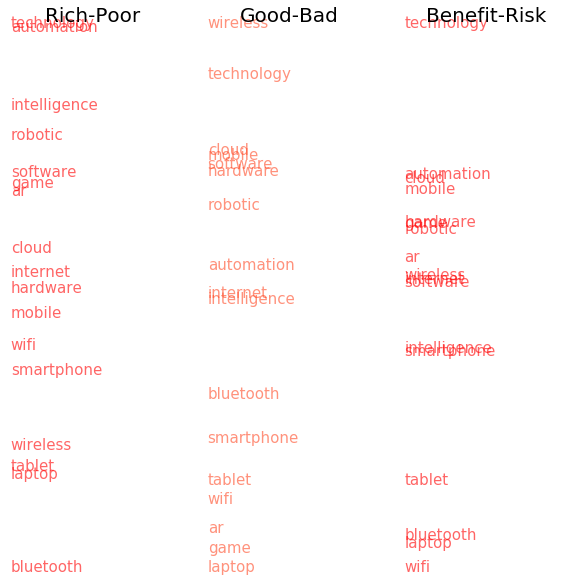

In [230]:
fig = plt.figure(figsize = (10,10))
ax1 = fig.add_subplot(131)
#PlotDimension(ax1, tech_df_y1, 'Human-Machine')
PlotDimension(ax1, tech_df_y3, 'Rich-Poor')
ax2 = fig.add_subplot(132)
PlotDimension(ax2, tech_df_y3, 'Good-Bad')
ax3 = fig.add_subplot(133)
PlotDimension(ax3, tech_df_y3, 'Benefit-Risk')
plt.show()

In [258]:
def Coloring(Series):
    x = Series.values
    y = x-x.min()
    z = y/y.max()
    c = list(plt.cm.rainbow(z))
    return c

def PlotDimension(ax,df, dim):
    ax.set_frame_on(False)
    ax.set_title(dim, fontsize = 20)
    colors = Coloring(df[dim])
    for i, word in enumerate(df.index):
        ax.annotate(word, (0, df[dim][i]), color = colors[3], alpha = 0.6, fontsize = 15)
    MaxY = df[dim].max()
    MinY = df[dim].min()
    plt.ylim(MinY,MaxY)
    plt.yticks(())
    plt.xticks(())

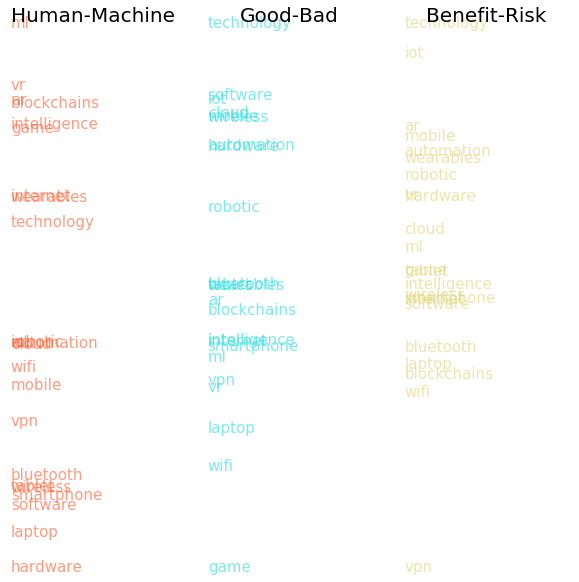

In [222]:
fig = plt.figure(figsize = (10,10))
ax1 = fig.add_subplot(131)
PlotDimension(ax1, tech_df, 'Human-Machine')
#PlotDimension(ax1, tech_df, 'Rich-Poor')
ax2 = fig.add_subplot(132)
PlotDimension(ax2, tech_df, 'Good-Bad')
ax3 = fig.add_subplot(133)
PlotDimension(ax3, tech_df, 'Benefit-Risk')
plt.show()

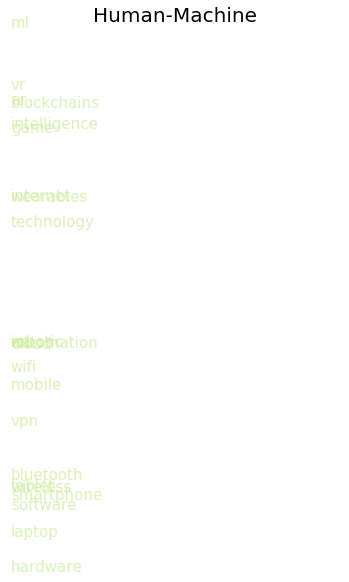

In [217]:
fig = plt.figure(figsize = (20,10))
ax1 = fig.add_subplot(132)
PlotDimension(ax1, tech_df, 'Human-Machine')
plt.show()

### Emotion

In [238]:
# 1-3
# 2-4
TargetWords = ['pleasant','superb','lovely','compliment','delightful','awesome','grateful','delight','alert','excited',
                'pathetic','suspicious','silly','idiot','shame','sad','embarrass','stupid','awkward','boredom',
               'creepy','nonsense','upset','crazy','scary','afraid','terrify',
              'comfortable','satisfactory','calm','relax']
#words we will be mapping
TargetWords += ["technology","smartphone","vr","game","robotic","automation","iot","intelligence","ar","wearables","internet","mobile","cloud","hardware","software","blockchains","ml","wifi","bluetooth","wireless","vpn","laptop","tablet"]

In [237]:
corpusW2V_2.similar_by_word('peace',topn=30)

[('independence', 0.7039347290992737),
 ('democracy', 0.692708432674408),
 ('prosperity', 0.6681150197982788),
 ('refugee', 0.6381546258926392),
 ('harmony', 0.6375091075897217),
 ('liberal', 0.6361614465713501),
 ('spirit', 0.6318711042404175),
 ('friendship', 0.6235570311546326),
 ('democratic', 0.6204949021339417),
 ('slavery', 0.608588695526123),
 ('citizenship', 0.5986688137054443),
 ('prosperous', 0.5981757640838623),
 ('muslim', 0.5943194627761841),
 ('migrant', 0.5894352197647095),
 ('syrian', 0.5892695784568787),
 ('capitalism', 0.5890320539474487),
 ('heritage', 0.5879592299461365),
 ('politician', 0.5847451686859131),
 ('flee', 0.5833690166473389),
 ('religion', 0.5801818370819092),
 ('ethnic', 0.5722654461860657),
 ('immigrant', 0.5707269906997681),
 ('equality', 0.564576268196106),
 ('mobilize', 0.5633137226104736),
 ('youth', 0.5621124505996704),
 ('hunger', 0.5610141754150391),
 ('buddha', 0.5607380867004395),
 ('god', 0.5588803291320801),
 ('socialism', 0.55713832378387

In [240]:
wordsSubMatrix = []
for word in TargetWords:
    wordsSubMatrix.append(corpusW2V_2[word])
wordsSubMatrix = np.array(wordsSubMatrix)

In [241]:
pcaWords = sklearn.decomposition.PCA(n_components = 50).fit(wordsSubMatrix)
reducedPCA_data = pcaWords.transform(wordsSubMatrix)
#T-SNE is theoretically better, but you should experiment
tsneWords = sklearn.manifold.TSNE(n_components = 2).fit_transform(reducedPCA_data)

In [244]:
one_three=dimension(corpusW2V_2, ['pleasant','superb','lovely','compliment','delightful','awesome','grateful','delight','alert','excited'],['pathetic','suspicious','silly','idiot','shame','sad','embarrass','stupid','awkward','boredom'])
two_four=dimension(corpusW2V_2, ['creepy','nonsense','upset','crazy','scary','afraid','terrify'],['comfortable','satisfactory','calm','relax'])

In [250]:
def makeDF(model, word_list):
    one = []
    two = []

    for word in word_list:
        one.append(sklearn.metrics.pairwise.cosine_similarity(model[word].reshape(1,-1), one_three.reshape(1,-1))[0][0])
        two.append(sklearn.metrics.pairwise.cosine_similarity(model[word].reshape(1,-1), two_four.reshape(1,-1))[0][0])
        
    df = pd.DataFrame({'One-Three': one, 'Two-Four': two}, index = word_list)
    return df

In [251]:
tech_df=makeDF(corpusW2V_2, tech)

In [261]:
tech_df

,One-Three,Two-Four
technology,0.162076,-0.231035
smartphone,0.105026,0.032302
vr,0.084184,0.174983
game,-0.099420,0.219126
robotic,0.169200,-0.004581
automation,0.096552,-0.146529
iot,0.136126,-0.009811
intelligence,-0.059380,0.067593
ar,0.189792,0.117074
wearables,0.178878,0.103522


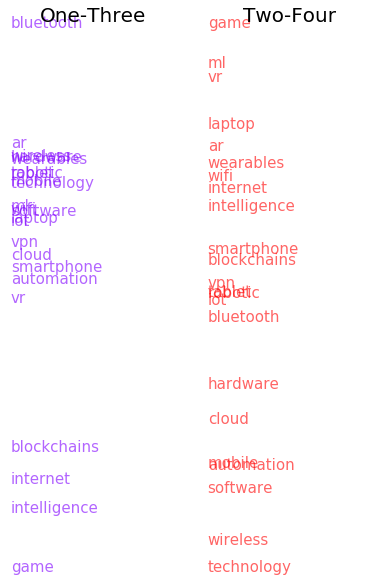

In [260]:
fig = plt.figure(figsize = (10,10))
ax1 = fig.add_subplot(131)
PlotDimension(ax1, tech_df, 'One-Three')
#PlotDimension(ax1, tech_df, 'Rich-Poor')
ax2 = fig.add_subplot(132)
PlotDimension(ax2, tech_df, 'Two-Four')

plt.show()

In [348]:
def calc_syn0norm(model):
    """since syn0norm is now depricated"""
    return (model.wv.syn0 / np.sqrt((model.wv.syn0 ** 2).sum(-1))[..., np.newaxis]).astype(np.float32)

def smart_procrustes_align_gensim(base_embed, other_embed, words=None):
    """Procrustes align two gensim word2vec models (to allow for comparison between same word across models).
    Code ported from HistWords <https://github.com/williamleif/histwords> by William Hamilton <wleif@stanford.edu>.
    (With help from William. Thank you!)
    First, intersect the vocabularies (see `intersection_align_gensim` documentation).
    Then do the alignment on the other_embed model.
    Replace the other_embed model's syn0 and syn0norm numpy matrices with the aligned version.
    Return other_embed.
    If `words` is set, intersect the two models' vocabulary with the vocabulary in words (see `intersection_align_gensim` documentation).
    """
    base_embed = copy.copy(base_embed)
    other_embed = copy.copy(other_embed)
    # make sure vocabulary and indices are aligned
    in_base_embed, in_other_embed = intersection_align_gensim(base_embed, other_embed, words=words)

    # get the embedding matrices
    base_vecs = calc_syn0norm(in_base_embed)
    other_vecs = calc_syn0norm(in_other_embed)

    # just a matrix dot product with numpy
    m = other_vecs.T.dot(base_vecs) 
    # SVD method from numpy
    u, _, v = np.linalg.svd(m)
    # another matrix operation
    ortho = u.dot(v) 
    # Replace original array with modified one
    # i.e. multiplying the embedding matrix (syn0norm)by "ortho"
    other_embed.wv.syn0norm = other_embed.wv.syn0 = (calc_syn0norm(other_embed)).dot(ortho)
    return other_embed
    
def intersection_align_gensim(m1,m2, words=None):
    """
    Intersect two gensim word2vec models, m1 and m2.
    Only the shared vocabulary between them is kept.
    If 'words' is set (as list or set), then the vocabulary is intersected with this list as well.
    Indices are re-organized from 0..N in order of descending frequency (=sum of counts from both m1 and m2).
    These indices correspond to the new syn0 and syn0norm objects in both gensim models:
        -- so that Row 0 of m1.syn0 will be for the same word as Row 0 of m2.syn0
        -- you can find the index of any word on the .index2word list: model.index2word.index(word) => 2
    The .vocab dictionary is also updated for each model, preserving the count but updating the index.
    """

    # Get the vocab for each model
    vocab_m1 = set(m1.wv.vocab.keys())
    vocab_m2 = set(m2.wv.vocab.keys())

    # Find the common vocabulary
    common_vocab = vocab_m1&vocab_m2
    if words: common_vocab&=set(words)

    # If no alignment necessary because vocab is identical...
    if not vocab_m1-common_vocab and not vocab_m2-common_vocab:
        return (m1,m2)

    # Otherwise sort by frequency (summed for both)
    common_vocab = list(common_vocab)
    common_vocab.sort(key=lambda w: m1.wv.vocab[w].count + m2.wv.vocab[w].count,reverse=True)

    # Then for each model...
    for m in [m1,m2]:
        # Replace old syn0norm array with new one (with common vocab)
        indices = [m.wv.vocab[w].index for w in common_vocab]
        old_arr = calc_syn0norm(m)
        new_arr = np.array([old_arr[index] for index in indices])
        m.wv.syn0norm = m.wv.syn0 = new_arr

        # Replace old vocab dictionary with new one (with common vocab)
        # and old index2word with new one
        m.index2word = common_vocab
        old_vocab = m.wv.vocab
        new_vocab = {}
        for new_index,word in enumerate(common_vocab):
            old_vocab_obj=old_vocab[word]
            new_vocab[word] = gensim.models.word2vec.Vocab(index=new_index, count=old_vocab_obj.count)
        m.wv.vocab = new_vocab

    return (m1,m2)

In [356]:
def compareModels(df, category, text_column_name='normalized_tokens', sort = True, embeddings_raw={}):
    """If you are using time as your category sorting is important"""
    if len(embeddings_raw) == 0:
        embeddings_raw = rawModels(df, category, text_column_name, sort)
    cats = sorted(set(df[category]))
    #These are much quicker
    embeddings_aligned = {}
    for catOuter in cats:
        embeddings_aligned[catOuter] = [embeddings_raw[catOuter]]
        for catInner in cats:
            embeddings_aligned[catOuter].append(smart_procrustes_align_gensim(embeddings_aligned[catOuter][-1], embeddings_raw[catInner]))
    return embeddings_raw, embeddings_aligned

In [357]:
def rawModels(df, category, text_column_name='normalized_tokens', sort = True):
    embeddings_raw = {}
    cats = sorted(set(df[category]))
    for cat in cats:
        #This can take a while
        print("Embedding {}".format(cat), end = '\r')
        subsetDF = df[df[category] == cat]
        #You might want to change the W2V parameters
        embeddings_raw[cat] = gensim.models.word2vec.Word2Vec(subsetDF[text_column_name].sum())
    return embeddings_raw

In [358]:
rawEmbeddings, comparedEmbeddings = compareModels(mycorpus, 'Year')

In [364]:
rawEmbeddings_c, comparedEmbeddings_c = compareModels(mycorpus, 'Country')

In [359]:
rawEmbeddings.keys()

dict_keys([10, 11, 12, 13, 14, 16, 18, 19])

In [366]:
rawEmbeddings_c.keys()

dict_keys(['au.txt', 'bd.txt', 'ca.txt', 'gb.txt', 'gh.txt', 'hk.txt', 'ie.txt', 'in.txt', 'in1.txt', 'in2.txt', 'jm.txt', 'ke.txt', 'lk.txt', 'my.txt', 'ng.txt', 'nz.txt', 'ph.txt', 'pk.txt', 'sg.txt', 'tz.txt', 'us.txt', 'us1.txt', 'us2.txt', 'us3.txt', 'us4.txt', 'us5.txt', 'xx.txt', 'za.txt'])

In [360]:
def getDivergenceDF(word, embeddingsDict):
    dists = []
    cats = sorted(set(embeddingsDict.keys()))
    dists = {}
    print(word)
    for cat in cats:
        dists[cat] = []
        for embed in embeddingsDict[cat][1:]:
            dists[cat].append(np.abs(1 - sklearn.metrics.pairwise.cosine_similarity(np.expand_dims(embeddingsDict[cat][0][word], axis = 0),
                                                                             np.expand_dims(embed[word], axis = 0))[0,0]))
    return pandas.DataFrame(dists, index = cats)

smartphones


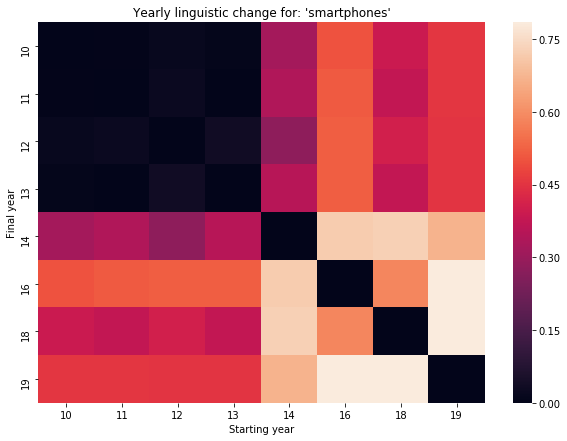

In [374]:
targetWord = 'smartphones'

pltDF = getDivergenceDF(targetWord, comparedEmbeddings)
fig, ax = plt.subplots(figsize = (10, 7))
seaborn.heatmap(pltDF, ax = ax, annot = False) #set annot True for a lot more information
ax.set_xlabel("Starting year")
ax.set_ylabel("Final year")
ax.set_ylabel("Final year")
ax.set_title("Yearly linguistic change for: '{}'".format(targetWord))
plt.show()

technology


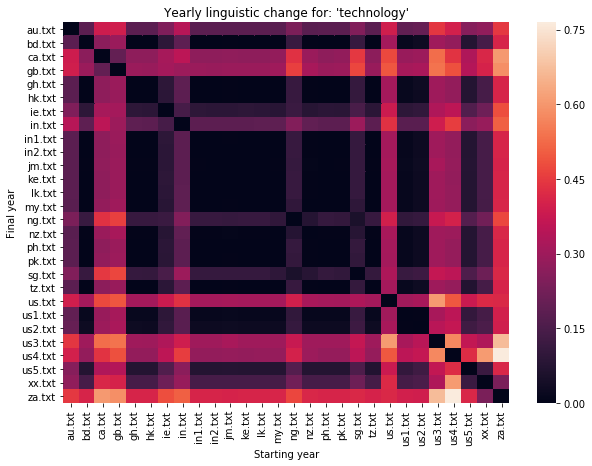

In [367]:
targetWord = 'technology'

pltDF = getDivergenceDF(targetWord, comparedEmbeddings_c)
fig, ax = plt.subplots(figsize = (10, 7))
seaborn.heatmap(pltDF, ax = ax, annot = False) #set annot True for a lot more information
ax.set_xlabel("Starting year")
ax.set_ylabel("Final year")
ax.set_ylabel("Final year")
ax.set_title("Yearly linguistic change for: '{}'".format(targetWord))
plt.show()

In [368]:
def findDiverence(word, embeddingsDict):
    cats = sorted(set(embeddingsDict.keys()))
    
    dists = []
    for embed in embeddingsDict[cats[0]][1:]:
        dists.append(1 - sklearn.metrics.pairwise.cosine_similarity(np.expand_dims(embeddingsDict[cats[0]][0][word], axis = 0), np.expand_dims(embed[word], axis = 0))[0,0])
    return sum(dists)

def findMostDivergent(embeddingsDict):
    words = []
    for embeds in embeddingsDict.values():
        for embed in embeds:
            words += list(embed.wv.vocab.keys())
    words = set(words)
    print("Found {} words to compare".format(len(words)))
    return sorted([(w, findDiverence(w, embeddingsDict)) for w in words], key = lambda x: x[1], reverse=True)
    

In [370]:
wordDivergences = findMostDivergent(comparedEmbeddings)

Found 2591 words to compare


In [371]:
wordDivergences[:20]

[('datum', 3.452618971467018),
 ('post', 3.4456552863121033),
 ('e', 3.41869293153286),
 ('south', 3.3831472992897034),
 ('award', 3.3433139622211456),
 ('president', 3.329188793897629),
 ('university', 3.327385723590851),
 ('year', 3.2979364693164825),
 ('time', 3.291257306933403),
 ('news', 3.289732649922371),
 ('chief', 3.264424040913582),
 ('director', 3.248991087079048),
 ('information', 3.2350055277347565),
 ('africa', 3.223025679588318),
 ('new', 3.207338199019432),
 ('comment', 3.1872302293777466),
 ('say', 3.1867962181568146),
 ('$', 3.171533241868019),
 ('dr', 3.16655595600605),
 ('ceo', 3.1373282968997955)]

In [372]:
wordDivergences[-20:]

[('side', 0.3182371258735657),
 ('surprisingly', 0.3174847364425659),
 ('craft', 0.3173432946205139),
 ('shield', 0.3119124174118042),
 ('abandon', 0.31132233142852783),
 ('headache', 0.3076432943344116),
 ('virtually', 0.30727672576904297),
 ('put', 0.3053452968597412),
 ('existence', 0.3022070527076721),
 ('fault', 0.30043095350265503),
 ('dictate', 0.29651957750320435),
 ('whilst', 0.29249364137649536),
 ('distinct', 0.2878001928329468),
 ('flaw', 0.2873309254646301),
 ('explosive', 0.286296546459198),
 ('notion', 0.2823448181152344),
 ('frequent', 0.280922532081604),
 ('evident', 0.25369083881378174),
 ('poorly', 0.19241327047348022),
 ('practically', 0.1917549967765808)]

datum


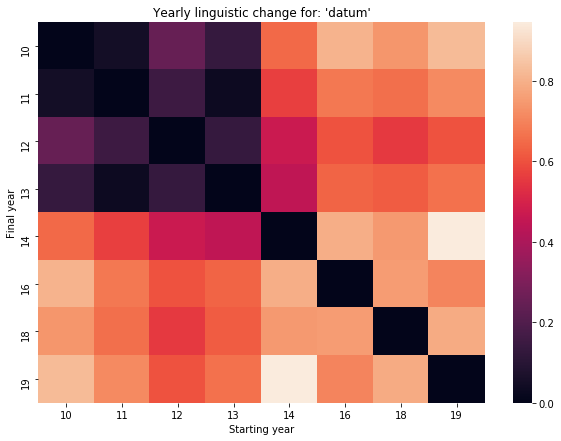

In [373]:
targetWord = wordDivergences[0][0]

pltDF = getDivergenceDF(targetWord, comparedEmbeddings)
fig, ax = plt.subplots(figsize = (10, 7))
seaborn.heatmap(pltDF, ax = ax, annot = False) #set annot True for a lot more information
ax.set_xlabel("Starting year")
ax.set_ylabel("Final year")
ax.set_ylabel("Final year")
ax.set_title("Yearly linguistic change for: '{}'".format(targetWord))
plt.show()